1. 데이터 불러오기 및  DataFrame으로 저장 
2. FCM ( Fuzzy )
3. K-means++ 적용 및 시각화
    - train case에 적용
    - test case에 적용
4. 확률 저장

In [ ]:
# !pip install fuzzy-c-means

In [22]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import pickle

import seaborn as sns 
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from mpl_toolkits.mplot3d import proj3d

import matplotlib.pyplot as plt

## 데이터 불러오기 및  DataFrame으로 저장

In [5]:
with open("pickle/dic_minmax.pickle", "rb") as handle:
    dic_minmax = pickle.load(handle)
print( dic_minmax.keys() )
print( len(dic_minmax['path']) )

dict_keys(['x_max', 'y_max', 'z_max', 'x_min', 'y_min', 'z_min', 'sum_max', 'sum_min', 'path'])
58631


In [6]:
with open("pickle/dic_minmax_test.pickle", "rb") as handle:
    dic_test = pickle.load(handle)
print( dic_test.keys() )
print( len(dic_test['path']) )

dict_keys(['x_max', 'y_max', 'z_max', 'x_min', 'y_min', 'z_min', 'sum_max', 'sum_min', 'path'])
8744


In [7]:
df = pd.DataFrame({'x_max' : dic_minmax['x_max'],
                   'y_max' : dic_minmax['y_max'],
                   'z_max' : dic_minmax['z_max'],
                  'x_min' : dic_minmax['x_min'],
                  'y_min' : dic_minmax['y_min'],
                  'z_min' : dic_minmax['z_min'],
                  'sum_max' : dic_minmax['sum_max'], 
                  'sum_min' : dic_minmax['sum_min'] 
                  })
print(len(df))

df_test = pd.DataFrame({'x_max' : dic_test['x_max'],
                   'y_max' : dic_test['y_max'],
                   'z_max' : dic_test['z_max'],
                  'x_min' : dic_test['x_min'],
                  'y_min' : dic_test['y_min'],
                  'z_min' : dic_test['z_min'],
                  'sum_max' : dic_test['sum_max'], 
                  'sum_min' : dic_test['sum_min'] 
                  })
print(len(df_test))

df_test.head()

58631
8744


,x_max,y_max,z_max,x_min,y_min,z_min,sum_max,sum_min
0,6.085938,6.125977,7.046875,-6.446289,-6.766602,-7.207031,1.081055,-2.402344
1,6.005859,6.045898,7.006836,-6.406250,-6.726562,-7.046875,1.081055,-2.322266
2,3.163086,3.323242,3.243164,-3.363281,-3.523438,-3.843750,-0.360352,-0.720703
3,6.526367,6.166016,6.846680,-6.846680,-7.006836,-6.926758,1.161133,-2.362305
4,12.972656,10.370117,12.091797,-13.092773,-10.570312,-12.732422,5.044922,-5.685547


## FCM ( Fuzzy C Means )

Fuzzy C Means을 적용해보았습니다.

In [5]:
from fcmeans import FCM

X = np.array([[key, dic_minmax['y_max'][i], dic_minmax['z_max'][i]] for i, key in enumerate(dic_minmax['x_max'])])

my_model = FCM(n_clusters=2) # we use two cluster as an example
my_model.fit(X) ## X, numpy array. rows:samples columns:features
centers = my_model.centers
labels = my_model.predict(X)

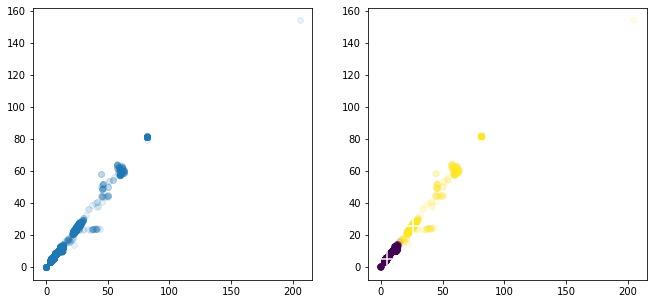

In [18]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=labels, alpha=.1)
axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='w')
plt.savefig('FCM-clustering-output.jpg')
plt.show()

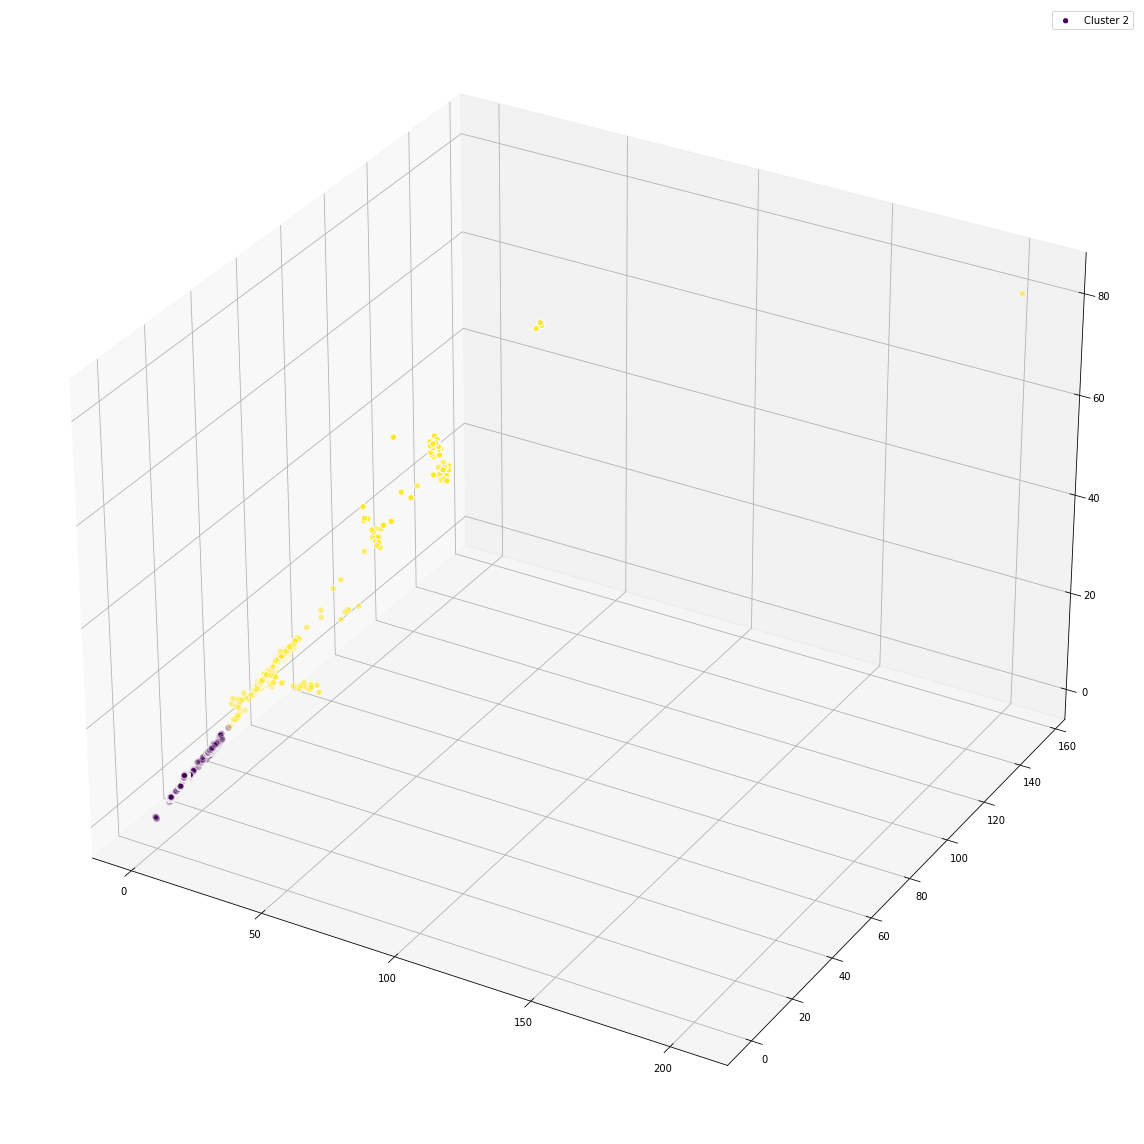

In [19]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df['x_max'], df['y_max'],df['z_max'], c=labels, edgecolor='white', marker='o', s=40, label='Cluster 2')
plt.savefig('FCM-3D-clustering-output.jpg')
plt.legend()
plt.tight_layout()
plt.show()

## K-means++ 적용 및 시각화

### train case에 적용

사실 clustering에는 train case에 적용하는 것이 큰 의미를 가지지는 않는다. ( 정답이 없기 때문에 )
하이퍼파라미터를 큰 데이터에 적용한다고 생각하자.

Text(0, 0.5, 'sum_min')

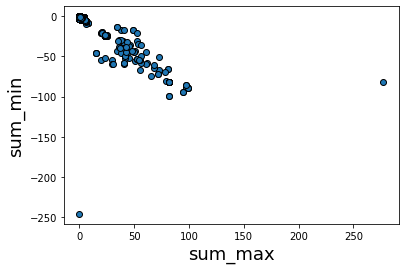

In [20]:
plt.scatter(df.sum_max, df.sum_min, edgecolor='black')
plt.xlabel('sum_max', fontsize=18)
plt.ylabel('sum_min', fontsize=18)

In [21]:
feature = ['sum_max', 'sum_min']
km = KMeans(n_clusters = 2, random_state=21)
km.fit(df[feature])

KMeans(n_clusters=2, random_state=21)

In [22]:
centers = km.cluster_centers_
print(centers)

[[  0.40859133  -1.3178888 ]
 [ 63.32433192 -62.86747996]]


Text(0.5, 1.0, 'K-means Clustering')

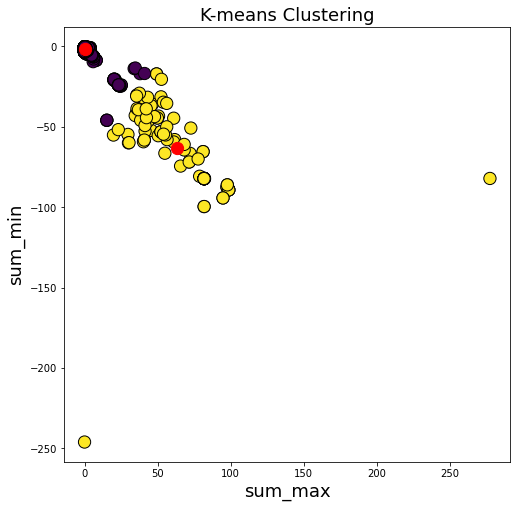

In [23]:
new_labels = km.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 1, figsize=(8,8))
axes.scatter(df.sum_max, df.sum_min, c=new_labels, edgecolor='black', s=150)
axes.scatter(centers[:,0], centers[:,1], c='red', s=150)

axes.set_xlabel('sum_max', fontsize=18)
axes.set_ylabel('sum_min', fontsize=18)

# axes.tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

axes.set_title('K-means Clustering', fontsize=18)

In [25]:
import math
def get_distance(dot, centers=centers) :
    x = dot.sum_max
    y = dot.sum_min
    return [math.sqrt((x - centers[0][0])**2 + (y-centers[0][1])**2 ), math.sqrt( (x - centers[1][0])**2 + (y-centers[1][1])**2 )] 

def get_probability(dist) :
    return [dist[1] / sum(dist), dist[0] / sum(dist) ]    # 1-dist[0] == dist[1]

In [26]:
df['distance'] = df[['sum_max', 'sum_min']].apply(get_distance, axis=1)
df['probability'] = df['distance'].apply(get_probability)
df.head(3)

,x_max,y_max,z_max,x_min,y_min,z_min,sum_max,sum_min,distance,probability
0,5.054932,5.094971,5.094971,-5.475342,-5.635498,-5.155029,-0.250244,-0.890869,"[0.7851178069262584, 88.78528599873646]","[0.9912346291456976, 0.008765370854302464]"
1,4.043945,4.164062,4.003906,-3.923828,-4.364258,-4.204102,0.280273,-0.560547,"[0.7681355856474166, 88.63806868573617]","[0.9914084755984516, 0.008591524401548442]"
2,3.283203,3.483398,3.483398,-3.443359,-3.683594,-4.003906,-0.320312,-0.800781,"[0.8937007420053603, 88.89834560912283]","[0.9900469943795402, 0.00995300562045974]"


### test case에 적용

엘보우 방법을 사용하여 최적의 클러스터 개수 찾기

(사실 이상치를 탐지하기 위해서 사용하는 것이라 대부분의 데이터가 모여있는 곳만 알아내면 된다. 따라서 최적의 k와 상관없이 최소한의 클러스터 개수인 2를 사용할 예정이다.)

In [33]:
feature = ['sum_max', 'sum_min']
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_test[feature])
    sum_of_squared_distances.append(km.inertia_)

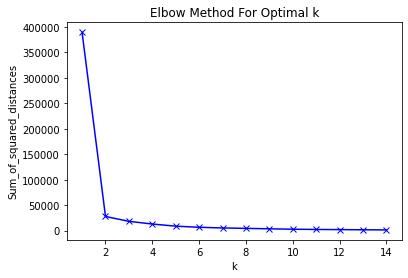

In [34]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [35]:
km = KMeans(n_clusters = 2)
km = km.fit(df_test[feature])

Text(0.5, 1.0, 'K-means Clustering')

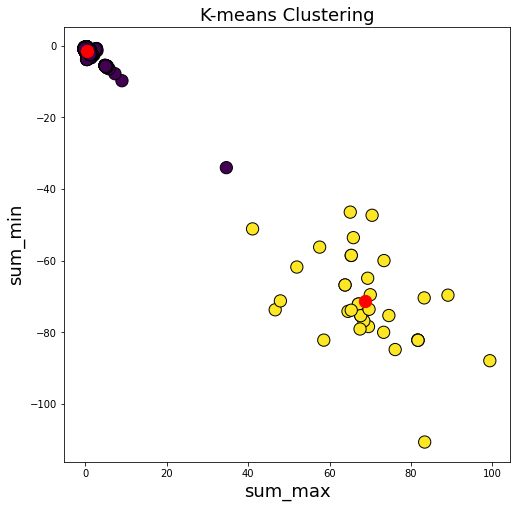

In [29]:
new_labels = km.labels_

# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 1, figsize=(8,8))
axes.scatter(df_test.sum_max, df_test.sum_min, c=new_labels, edgecolor='black', s=150)
axes.scatter(centers[:,0], centers[:,1], c='red', s=150)

axes.set_xlabel('sum_max', fontsize=18)
axes.set_ylabel('sum_min', fontsize=18)

# axes.tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

axes.set_title('K-means Clustering', fontsize=18)

In [28]:
centers = km.cluster_centers_
print(centers)

[[  0.47659868  -1.35588576]
 [ 68.77499229 -71.37542403]]


In [30]:
df_test['distance'] = df_test[['sum_max', 'sum_min']].apply(get_distance, axis=1)
df_test['probability'] = df_test['distance'].apply(get_probability)

## 확률 저장

In [31]:
with open("probability_kmeans_plus.pickle", "wb") as handle:
    pickle.dump(df['probability'], handle, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
with open("probability_kmeans_plus_testcase.pickle", "wb") as handle:
    pickle.dump(df_test['probability'], handle, protocol=pickle.HIGHEST_PROTOCOL)

--------------------------

## r, s, t의 min, max값 클러스터링

정상 모터의 r, s, t의 min값은 근접해있을 것이다.

정상 모터의 r, s, t의 max값은 근접해있을 것이다.

### r, s, t의 max값 클러스터링

In [17]:
feature = ['x_max', 'y_max', 'z_max']
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df[feature])
    sum_of_squared_distances.append(km.inertia_)

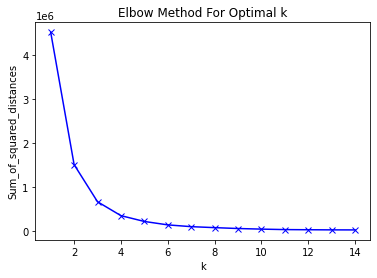

In [18]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
# k = 4

In [19]:
km = KMeans(n_clusters = 4)
km = km.fit(df[feature])

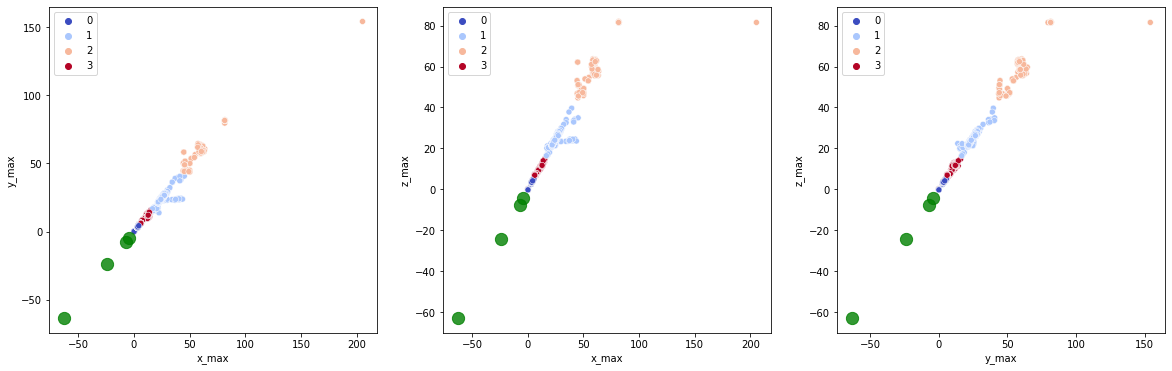

In [47]:
feature = ['x_max', 'y_max', 'z_max']

centers = km.cluster_centers_

plt.figure(figsize=(20, 6)) 
X = df[feature] 

plt.subplot(131) 
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=df, hue=km.labels_, palette='coolwarm') 
plt.scatter(centers[:,0], centers[:,1], c='green', alpha=0.8, s=150) 

plt.subplot(132) 
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=df, hue=km.labels_, palette='coolwarm') 
plt.scatter(centers[:,0], centers[:,2], c='green', alpha=0.8, s=150) 

plt.subplot(133) 
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,2], data=df, hue=km.labels_, palette='coolwarm') 
plt.scatter(centers[:,1], centers[:,2], c='green', alpha=0.8, s=150)

plt.show()

In [48]:
# 연속형 범주이기 때문에 최빈값보다는 중앙값이 가장 많은 데이터가 모여있는 중심점으로 볼 수 있을 것이다.
print('최빈값 : ', df['x_max'].mode())
print('중앙값 : ',df['x_max'].median())

print('----------')
print('최빈값 : ',df['y_max'].mode())
print('중앙값 : ',df['y_max'].median())

print('----------')

print('최빈값 : ',df['z_max'].mode())
print('중앙값 : ',df['z_max'].median())

최빈값 :  0    4.324219
dtype: float64
중앙값 :  4.8096923828125
----------
최빈값 :  0    4.324219
dtype: float64
중앙값 :  4.974853515625
----------
최빈값 :  0    4.204102
dtype: float64
중앙값 :  4.8447265625


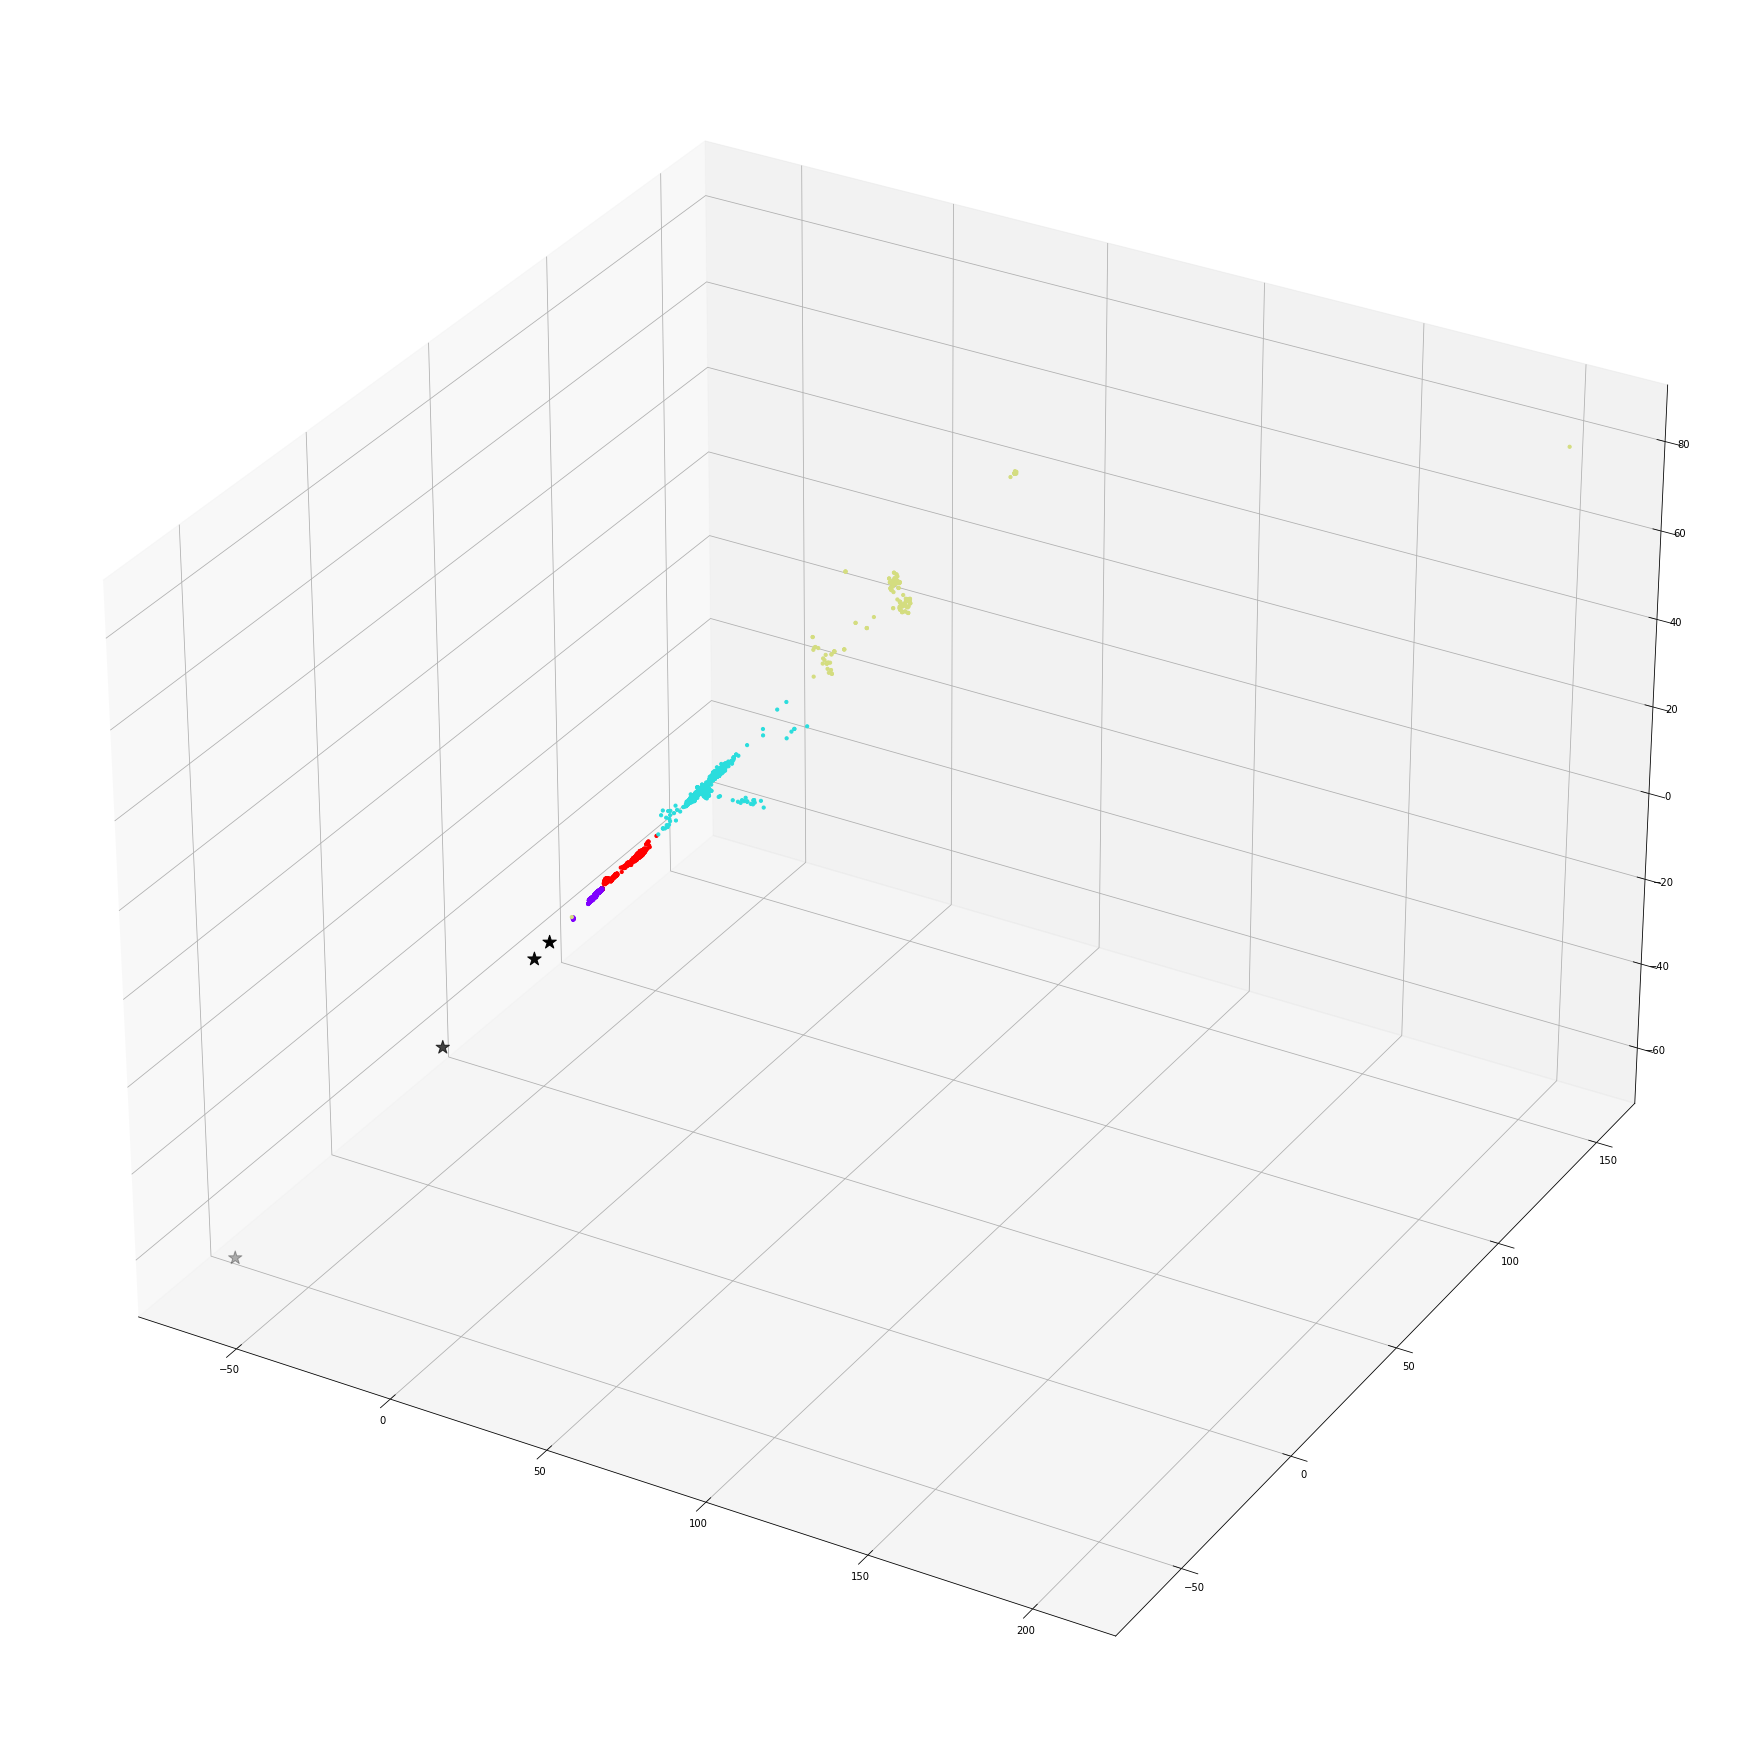

In [49]:
# 3차원으로 시각화하기 
fig = plt.figure(figsize=(32, 32)) 
ax = fig.add_subplot(111, projection='3d') 
# 데이터 scatterplot 
ax.scatter( X.iloc[:,0] , X.iloc[:,1] , X.iloc[:,2] , c = km.labels_, s = 10 , cmap = "rainbow" , alpha = 1 ) 

# centroid scatterplot 
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*') 

plt.show()

### r, s, t의 min값 클러스터링

In [30]:
feature = ['x_min', 'y_min', 'z_min']
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df[feature])
    sum_of_squared_distances.append(km.inertia_)

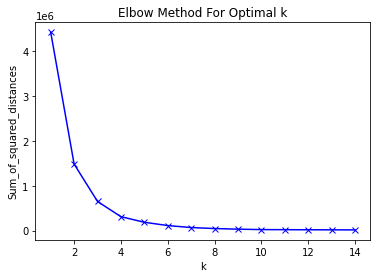

In [31]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
# k = 4

In [32]:
km = KMeans(n_clusters = 4)
km = km.fit(df[feature])

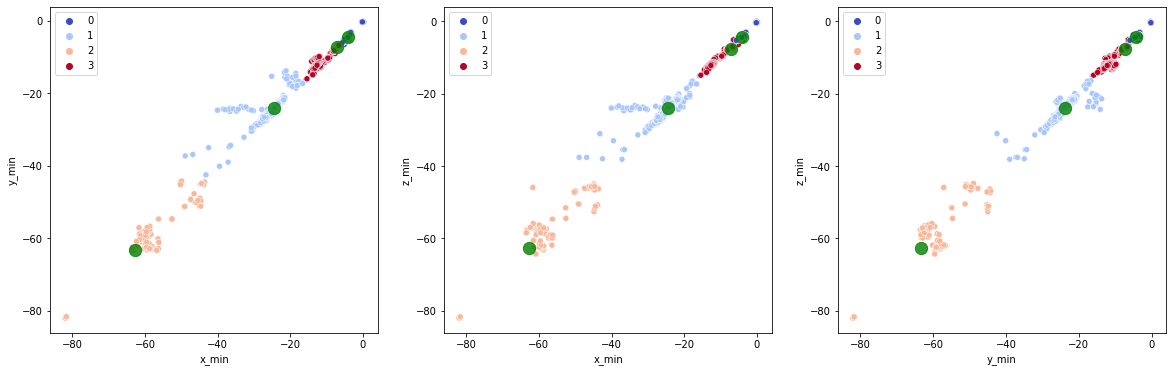

In [45]:
feature = ['x_min', 'y_min', 'z_min']
centers = km.cluster_centers_

plt.figure(figsize=(20, 6)) 
X = df[feature] 

plt.subplot(131) 
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=df, hue=km.labels_, palette='coolwarm') 
plt.scatter(centers[:,0], centers[:,1], c='green', alpha=0.8, s=150) 

plt.subplot(132) 
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=df, hue=km.labels_, palette='coolwarm') 
plt.scatter(centers[:,0], centers[:,2], c='green', alpha=0.8, s=150) 

plt.subplot(133) 
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,2], data=df, hue=km.labels_, palette='coolwarm') 
plt.scatter(centers[:,1], centers[:,2], c='green', alpha=0.8, s=150)

plt.show()

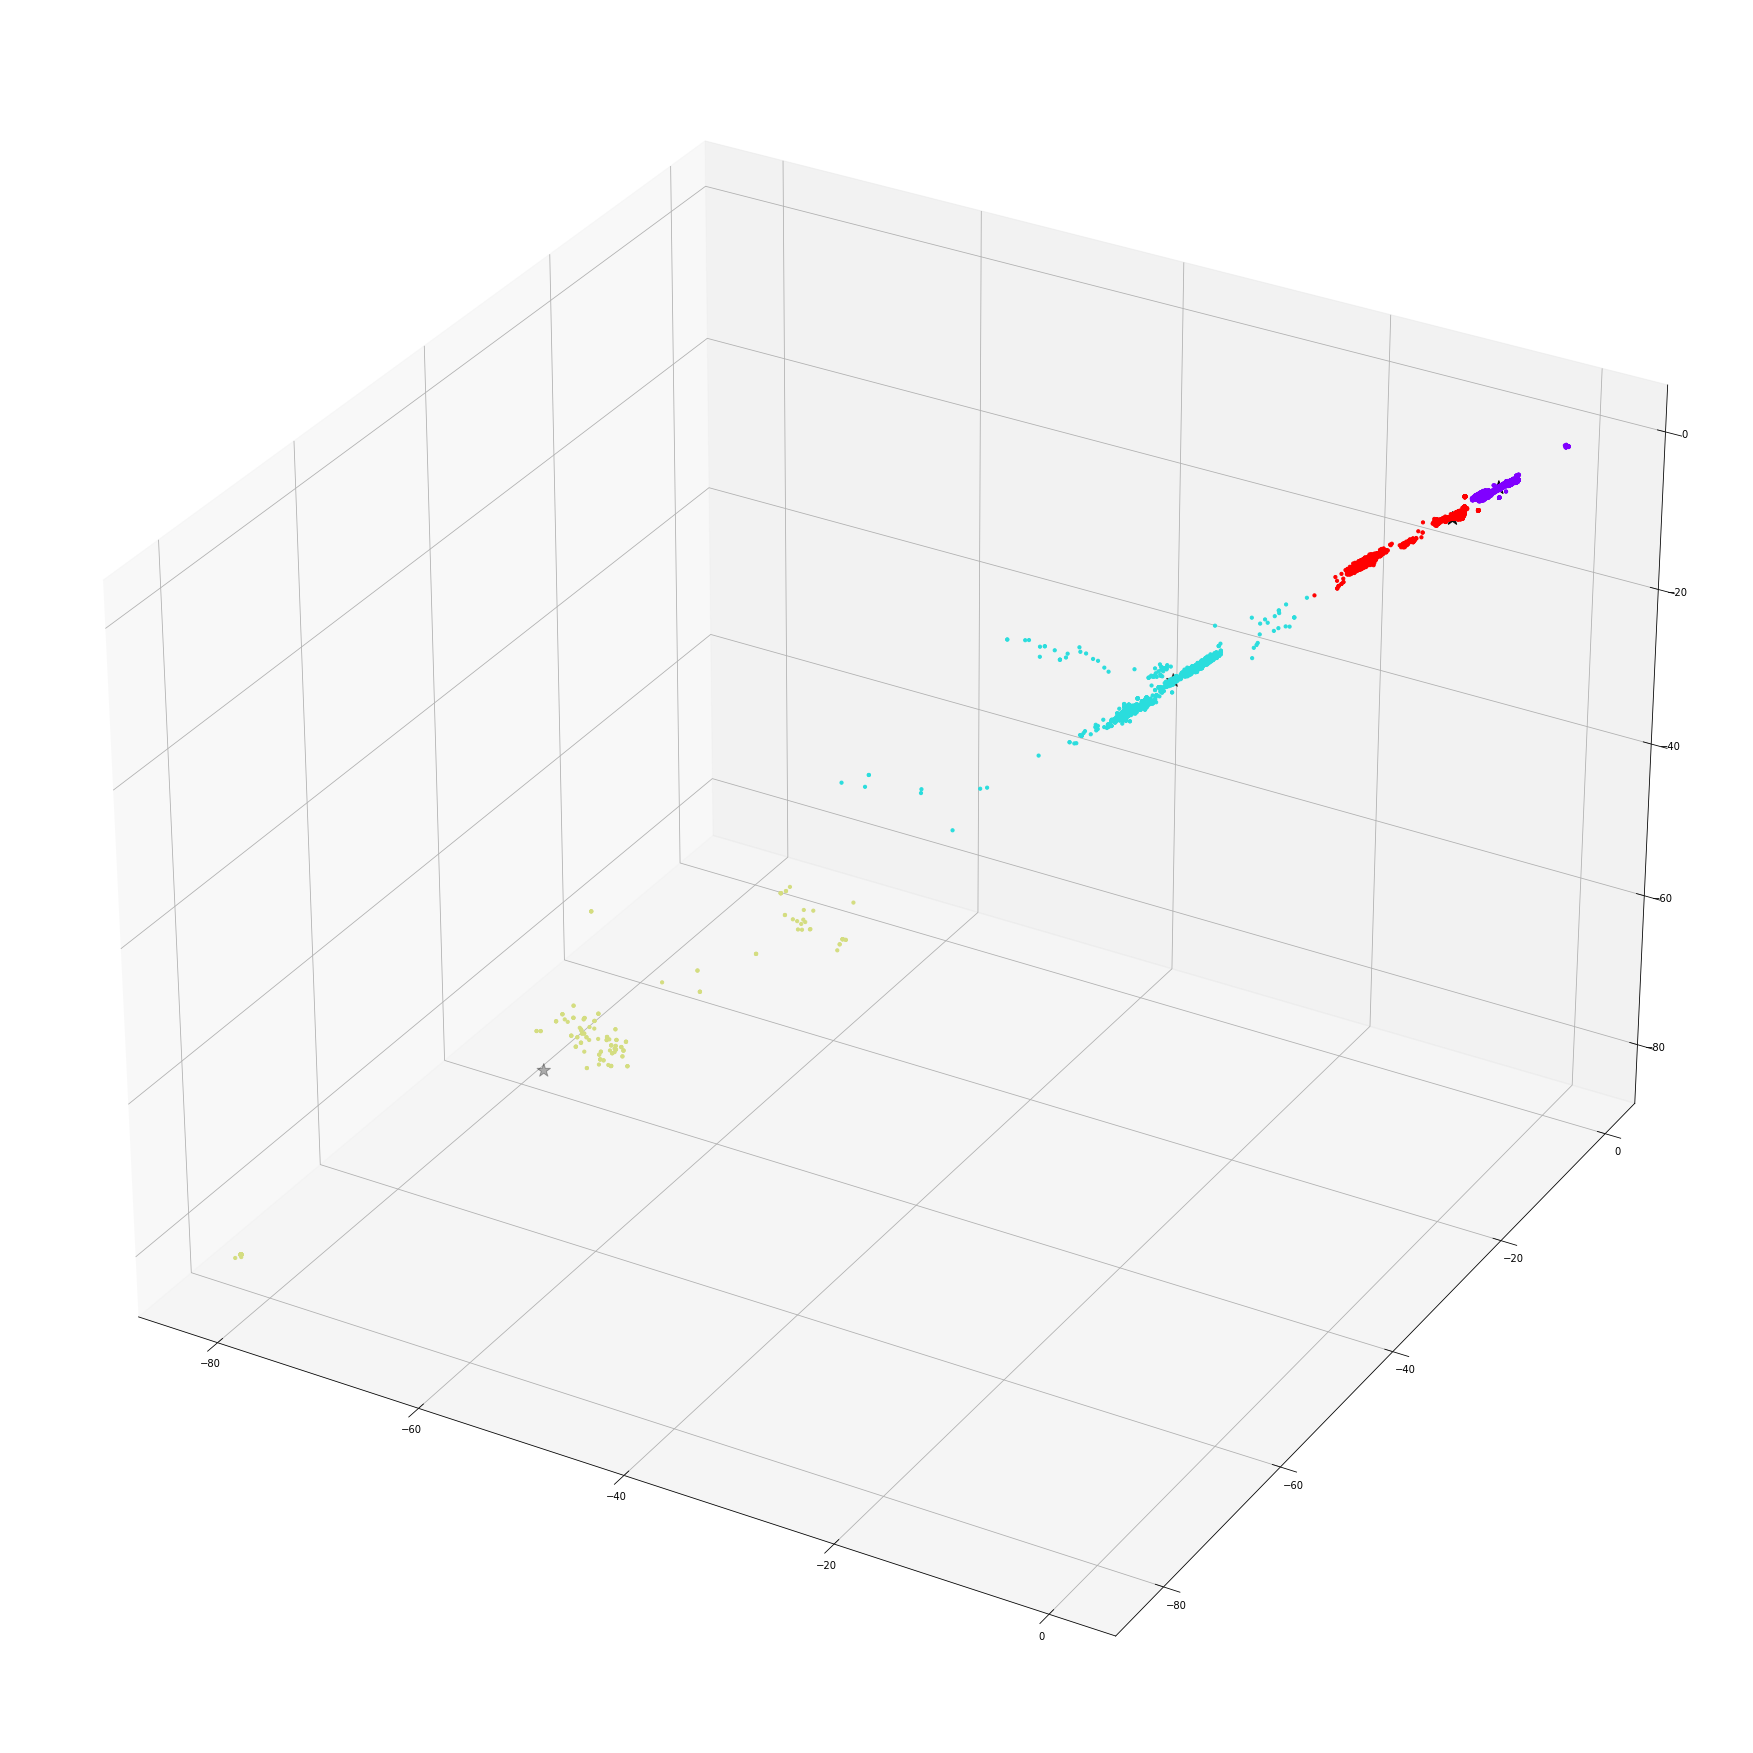

In [46]:

# 3차원으로 시각화하기 
fig = plt.figure(figsize=(32, 32)) 
ax = fig.add_subplot(111, projection='3d') 
# 데이터 scatterplot 
ax.scatter( X.iloc[:,0] , X.iloc[:,1] , X.iloc[:,2] , c = km.labels_, s = 10 , cmap = "rainbow" , alpha = 1 ) 

# centroid scatterplot 
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*') 

plt.show()

In [40]:
# 연속형 범주이기 때문에 최빈값보다는 중앙값이 가장 많은 데이터가 모여있는 중심점으로 볼 수 있을 것이다.
print('최빈값 : ', df['x_min'].mode())
print('중앙값 : ',df['x_min'].median())

print('----------')
print('최빈값 : ',df['y_min'].mode())
print('중앙값 : ',df['y_min'].median())

print('----------')

print('최빈값 : ',df['z_min'].mode())
print('중앙값 : ',df['z_min'].median())

최빈값 :  0   -4.164062
dtype: float64
중앙값 :  -5.2451171875
----------
최빈값 :  0   -4.524414
dtype: float64
중앙값 :  -5.5103759765625
----------
최빈값 :  0   -4.444336
dtype: float64
중앙값 :  -4.96484375


### r, s, t의 min, max값으로 clustering한 결과

각각의 중앙값으로 해당 클러스터에 속할 확률(정상일 확률)을 구하는게 더 나을 것 같다.

In [59]:
import math
m=[-5.2451171875, -5.5103759765625, -4.96484375]
def get_distance(temp, m=m) :  # m : mode, 3개의 값이 있는 배열
    return math.sqrt( (temp.x_min - m[0]) **2 + (temp.y_min - m[1])**2 + (temp.z_min - m[2])**2 )

In [60]:
df['min_dist'] = df[['x_min', 'y_min', 'z_min']].apply(get_distance, axis=1)

In [65]:
m=[4.8096923828125, 4.974853515625, 4.8447265625]
def get_distance(temp, m=m) :  # m : mode, 3개의 값이 있는 배열
    return math.sqrt( (temp.x_max - m[0]) **2 + (temp.y_max - m[1])**2 + (temp.z_max - m[2])**2 )

df['max_dist'] = df[['x_max', 'y_max', 'z_max']].apply(get_distance, axis=1)

In [66]:
df.head()

,x_max,y_max,z_max,x_min,y_min,z_min,sum_max,sum_min,min_dist,max_dist
0,5.054932,5.094971,5.094971,-5.475342,-5.635498,-5.155029,-0.250244,-0.890869,0.323774,0.370395
1,4.043945,4.164062,4.003906,-3.923828,-4.364258,-4.204102,0.280273,-0.560547,1.907386,1.396685
2,3.283203,3.483398,3.483398,-3.443359,-3.683594,-4.003906,-0.320312,-0.800781,2.739866,2.531368
3,3.333252,3.293213,3.333252,-3.473389,-3.553467,-3.873779,-0.290283,-0.730713,2.856385,2.700435
4,4.604492,4.804688,4.804688,-5.165039,-5.325195,-4.804688,-0.320312,-0.960938,0.257593,0.269568


In [82]:
# min_dist > 3  : 12820 rows
# min_dist > 5  : 3589 rows
# min_dist > 8  : 3524 rows
# min_dist > 10  : 3454 rows
# min_dist > 10  |  max_dist > 10 : 3455 rows


df[(df['min_dist'] > 10) | (df['max_dist'] > 10)]

# 원래 전류가 크게 흐르는 곳일까?

,x_max,y_max,z_max,x_min,y_min,z_min,sum_max,sum_min,min_dist,max_dist
13,23.583008,22.862305,23.342773,-23.462891,-22.982422,-23.062500,1.241211,-1.281250,31.059376,31.852410
28,21.460938,21.220703,20.980469,-21.661133,-21.500977,-20.860352,1.361328,-1.321289,27.889999,28.311725
49,12.251953,11.651367,11.811523,-12.211914,-11.891602,-11.851562,0.400391,-0.600586,11.691159,12.186030
67,12.732422,11.771484,11.851562,-12.772461,-11.771484,-11.851562,0.440430,-0.640625,11.970350,12.572175
79,13.092773,12.051758,12.171875,-13.092773,-12.051758,-12.131836,0.480469,-0.680664,12.479630,13.129323
...,...,...,...,...,...,...,...,...,...,...
58568,12.412109,11.851562,11.851562,-12.452148,-12.011719,-11.931641,0.520508,-0.720703,11.947595,12.416989
58591,12.412109,11.491211,11.931641,-12.492188,-11.731445,-11.851562,0.400391,-0.680664,11.774915,12.267192
58600,13.823486,14.263916,13.983643,-13.843506,-14.844482,-14.123779,0.030029,-0.610596,15.650685,15.844714
58603,12.812500,11.971680,11.611328,-12.572266,-11.971680,-12.332031,0.080078,-0.840820,12.235645,12.601087
